# Description:
This project work mainly focuses on analysing the Consumer Price Index data of whole India from January 2013 to March 2023. In the following the work, the aim is to achieve a good insight about the data and to build a model to forecast the Index number in upcoming future. The following dataset contains various columns such regarding the changing CPI values of all over the year. Those columns are Cereals and products, Meat and Fish, Egg, Milk and products and many more. Also the following data contains Consumer Price Index (CPI) values for Rural, Urban and Rural and Urban combined sector.

The dataset is collected from [here](https://data.gov.in/files/ogdpv2dms/s3fs-public/All_India_Index_july2019_20Aug2020_dec20_0.csv)

# Problem Formulation:
The main objective of this work is to develop an insight about the CPI numbers over different sectors and predict the CPI numbers by building the best time series model.

```
Software Used: Python and R-Studio
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid",palette='deep', font='sans-serif')
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EDA_DA/All_India_Index_july2019_20Aug2020_dec20_0.csv',dtype={'Year':str})

In [3]:
# first 2 rows of the data
df.head(2)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0


In [4]:
# describtive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cereals and products,363.0,136.070523,14.328877,107.5,124.050,135.60,146.000,174.7
Meat and fish,360.0,155.327222,32.819364,106.3,129.800,143.90,190.150,223.4
Egg,363.0,140.285124,22.347112,102.7,122.000,134.90,157.150,197.0
Milk and products,363.0,139.686226,17.812480,103.6,128.250,140.80,153.750,177.9
Oils and fats,363.0,131.473278,29.759782,101.1,110.400,119.90,138.200,209.9
Fruits,363.0,140.286777,16.959676,102.3,130.250,140.20,151.800,179.5
Vegetables,363.0,155.646556,28.054053,101.4,134.800,153.20,171.200,245.3
Pulses and products,363.0,140.880716,23.747592,103.5,119.850,138.30,164.100,191.6
Sugar and Confectionery,363.0,110.737466,8.970903,85.3,103.400,113.20,118.150,123.9
Spices,363.0,143.365289,25.558353,101.8,127.100,139.50,160.600,212.1


In [5]:
df.columns

Index(['Sector', 'Year', 'Month', 'Cereals and products', 'Meat and fish',
       'Egg', 'Milk and products', 'Oils and fats', 'Fruits', 'Vegetables',
       'Pulses and products', 'Sugar and Confectionery', 'Spices',
       'Non-alcoholic beverages', 'Prepared meals, snacks, sweets etc.',
       'Food and beverages', 'Pan, tobacco and intoxicants', 'Clothing',
       'Footwear', 'Clothing and footwear', 'Housing', 'Fuel and light',
       'Household goods and services', 'Health', 'Transport and communication',
       'Recreation and amusement', 'Education', 'Personal care and effects',
       'Miscellaneous', 'General index'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               366 non-null    object 
 1   Year                                 366 non-null    object 
 2   Month                                366 non-null    object 
 3   Cereals and products                 363 non-null    float64
 4   Meat and fish                        360 non-null    float64
 5   Egg                                  363 non-null    float64
 6   Milk and products                    363 non-null    float64
 7   Oils and fats                        363 non-null    float64
 8   Fruits                               363 non-null    float64
 9   Vegetables                           363 non-null    float64
 10  Pulses and products                  363 non-null    float64
 11  Sugar and Confectionery         

**Dividing the dataset in terms of sectors.**

In [7]:
df_r = df[df.Sector == 'Rural']
df_u = df[df.Sector == 'Urban']
df_ru = df[df.Sector == 'Rural+Urban']

In [8]:
print('The shape of rural sector dataframe is {} and urban sector dataframe is {} and rural + urban dataframe is {} '.format(df_r.shape, df_u.shape, df_ru.shape))

The shape of rural sector dataframe is (122, 30) and urban sector dataframe is (122, 30) and rural + urban dataframe is (122, 30) 


# Rural 

In [9]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 363
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               122 non-null    object 
 1   Year                                 122 non-null    object 
 2   Month                                122 non-null    object 
 3   Cereals and products                 121 non-null    float64
 4   Meat and fish                        120 non-null    float64
 5   Egg                                  121 non-null    float64
 6   Milk and products                    121 non-null    float64
 7   Oils and fats                        121 non-null    float64
 8   Fruits                               121 non-null    float64
 9   Vegetables                           121 non-null    float64
 10  Pulses and products                  121 non-null    float64
 11  Sugar and Confectionery         

**Formatting the Date column into a timestamp format**

In [10]:
df_r['Date'] = pd.to_datetime(df_r['Year'] + ' ' + df_r['Month'])
# shift column 'Name' to first position
first_column = df_r.pop('Date')
  
# insert column using insert(position,column_name,
# first_column) function
df_r.insert(0, 'Date', first_column)

In [11]:
df_r.drop(['Year','Month'],axis = 1, inplace = True)
df_r.reset_index(drop=True,inplace=True)

**Removing the non significant columns**

In [12]:
df_r.drop(['Housing'],axis = 1, inplace = True)

**Replacing the null values with forward fill method**

In [13]:
df_r = df_r.fillna(method='ffill')

# Visualisation of Rural Data

In [14]:
import textwrap

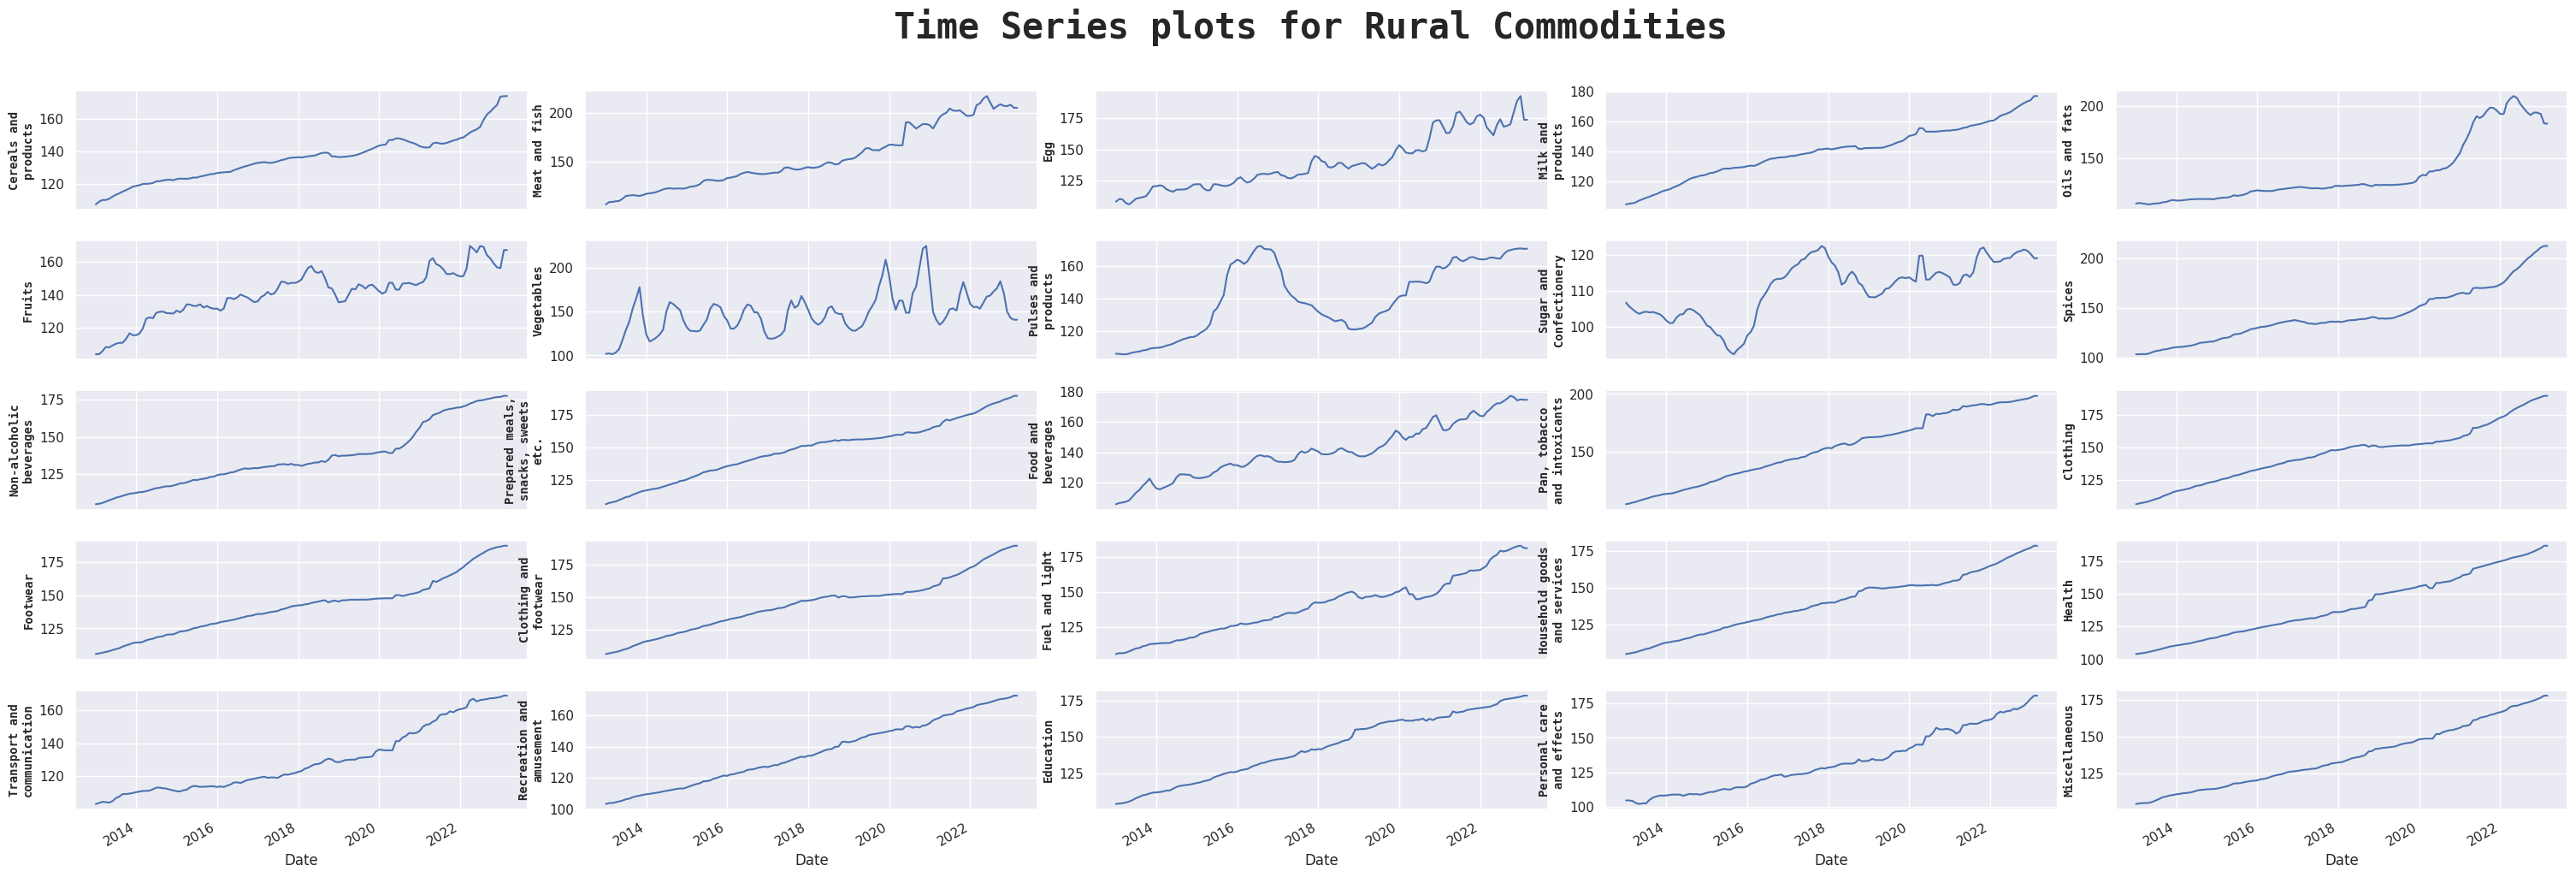

In [15]:
# Plot the responses for different events and regions
cols = df_r.columns[2:27]
length = len(cols)
wrapped_labels = [textwrap.fill(label, 15) for label in cols]
# Creating subplot axes
fig, axes = plt.subplots(5,5,figsize=(30,12),sharex = True)
fig.tight_layout(h_pad = 2)
i = 0
for name, ax in zip(cols, axes.flatten()):
  # Adjust the width parameter as needed
  sns.lineplot(y=name, x= "Date", data=df_r, ax=ax)
  ax.set_ylabel(wrapped_labels[i],fontproperties={'family':'monospace', 'size':10,'weight':'demibold'})
  i += 1

plt.suptitle('Time Series plots for Rural Commodities',size = 30, fontproperties={'family':'monospace', 'weight':'bold'})
fig.subplots_adjust(top=0.9)

plt.gcf().autofmt_xdate()
plt.show()

# Urban

In [16]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 364
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               122 non-null    object 
 1   Year                                 122 non-null    object 
 2   Month                                122 non-null    object 
 3   Cereals and products                 121 non-null    float64
 4   Meat and fish                        120 non-null    float64
 5   Egg                                  121 non-null    float64
 6   Milk and products                    121 non-null    float64
 7   Oils and fats                        121 non-null    float64
 8   Fruits                               121 non-null    float64
 9   Vegetables                           121 non-null    float64
 10  Pulses and products                  121 non-null    float64
 11  Sugar and Confectionery         

**Formatting the Date column to timestamp format**

In [17]:
df_u['Date'] = pd.to_datetime(df_u['Year'] + ' ' + df_u['Month'])
# shift column 'Name' to first position
first_column = df_u.pop('Date')
  
# insert column using insert(position,column_name,
# first_column) function
df_u.insert(0, 'Date', first_column)

In [18]:
df_u.drop(['Year','Month'],axis = 1, inplace = True)
df_u.reset_index(drop=True,inplace=True)

In [19]:
df_u['Housing'] = df_u.Housing.astype(float)

**Removing Null Values**

In [20]:
df_u = df_u.fillna(method='ffill')

# Visualisation of Urban Data

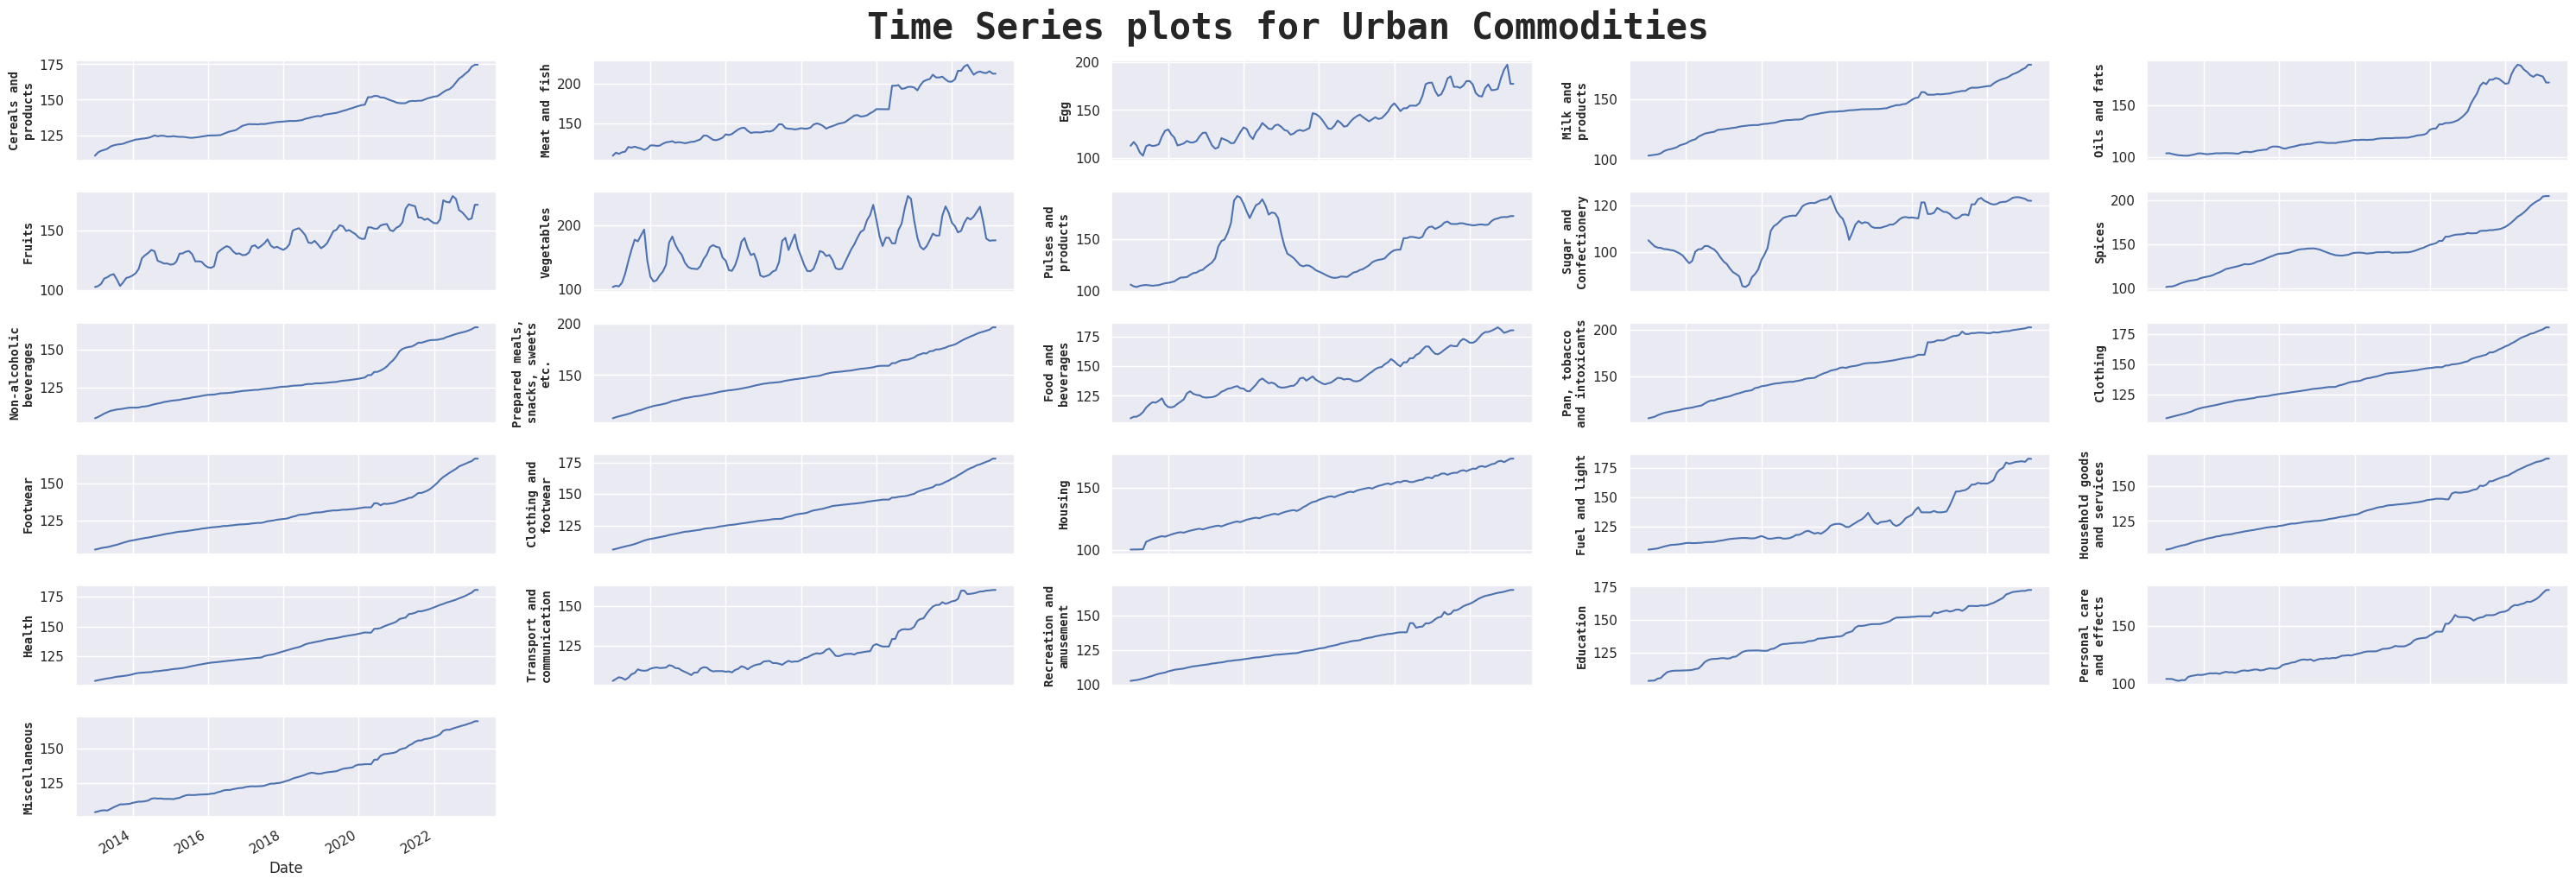

In [21]:
# Plot the responses for different events and regions
cols = df_u.columns[2:28]
length = len(cols)
wrapped_labels = [textwrap.fill(label, 15) for label in cols]
# Creating subplot axes
fig, axes = plt.subplots(6,5,figsize=(30,12),sharex = True)
i = 0
for name, ax in zip(cols, axes.flatten()):
  # Adjust the width parameter as needed
  sns.lineplot(y=name, x= "Date", data=df_u, ax=ax)
  ax.set_ylabel(wrapped_labels[i],fontproperties={'family':'monospace', 'size':10,'weight':'demibold'})
  i += 1

plt.suptitle('Time Series plots for Urban Commodities',size = 30, fontproperties={'family':'monospace', 'weight':'bold'})
fig.subplots_adjust(top=0.9)

for i in range(26, len(axes.flatten())):
  fig.delaxes(axes.flatten()[i])
fig.tight_layout(h_pad = 2)

plt.gcf().autofmt_xdate()
plt.show()

# Rural and Urban (Combined)

In [22]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 2 to 365
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               122 non-null    object 
 1   Year                                 122 non-null    object 
 2   Month                                122 non-null    object 
 3   Cereals and products                 121 non-null    float64
 4   Meat and fish                        120 non-null    float64
 5   Egg                                  121 non-null    float64
 6   Milk and products                    121 non-null    float64
 7   Oils and fats                        121 non-null    float64
 8   Fruits                               121 non-null    float64
 9   Vegetables                           121 non-null    float64
 10  Pulses and products                  121 non-null    float64
 11  Sugar and Confectionery         

**Data Cleaning:**

Formatting the misspelled words from the dataset.

In [23]:
df_ru[df_ru['Month']=='Marcrh']

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
44,Rural+Urban,2014,Marcrh,120.7,119.3,121.0,116.1,106.9,118.7,116.3,...,113.2,112.5,113.2,111.2,111.4,110.6,112.0,109.0,111.3,114.2


In [24]:
df_ru[df_ru['Month']=='Marcrh'].index

Int64Index([44], dtype='int64')

In [25]:
df_ru.at[44,'Month']='March'

In [26]:
df_ru[df_ru['Month']=='Marcrh']

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index


**Formatting the Date column to timestamp format**

In [27]:
df_ru['Date'] = pd.to_datetime(df_ru['Year'] + ' ' + df_ru['Month'])
# shift column 'Name' to first position
first_column = df_ru.pop('Date')
  
# insert column using insert(position,column_name,
# first_column) function
df_ru.insert(0, 'Date', first_column)

In [28]:
df_ru.drop(['Year','Month'],axis = 1, inplace = True)
df_ru.reset_index(drop=True,inplace=True)

In [29]:
df_ru['Housing'] = df_ru.Housing.astype(float)

**Replacing Null Values with forward fill method**

In [30]:
df_ru = df_ru.fillna(method='ffill')

# Visualisation of Rural and Urban Data Combined

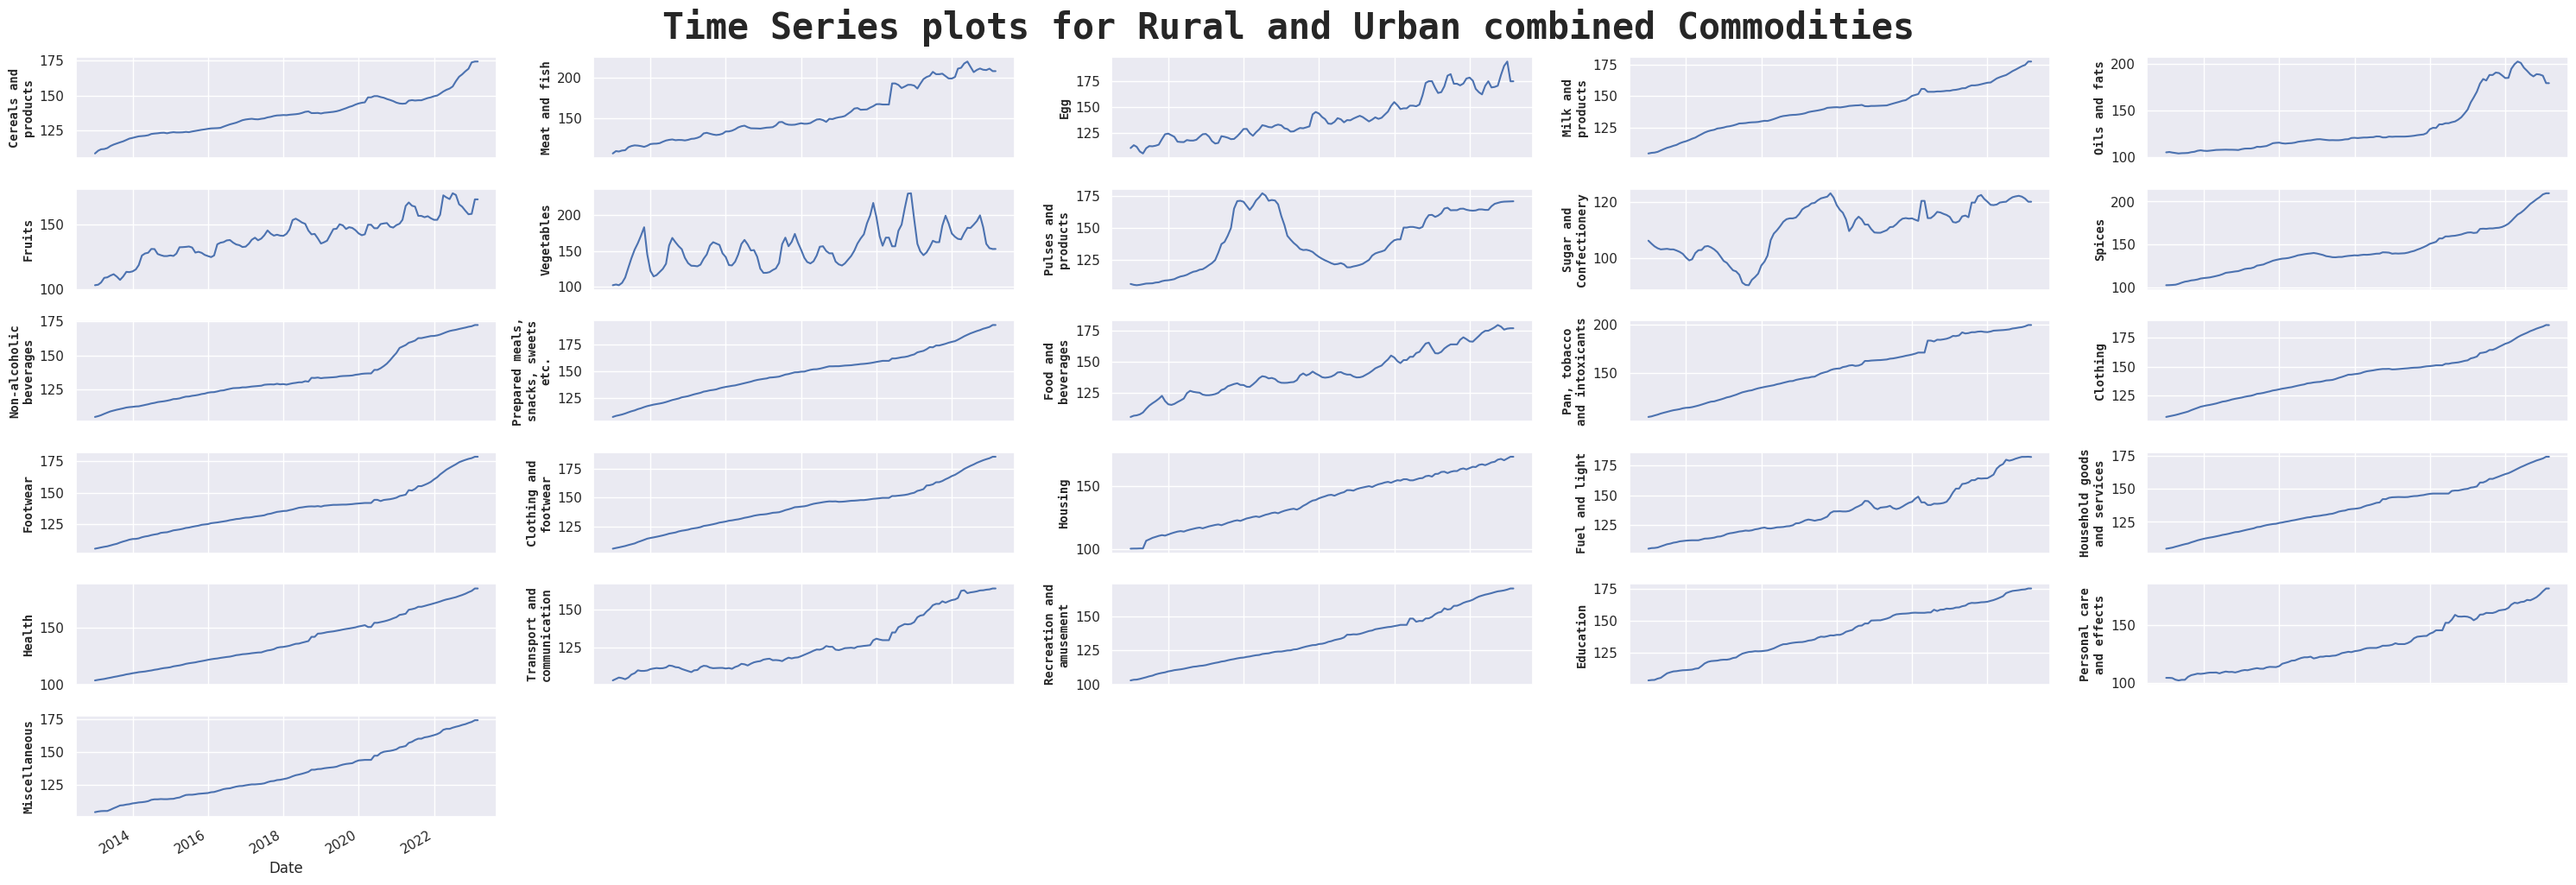

In [31]:
# Plot the responses for different events and regions
cols = df_ru.columns[2:28]
length = len(cols)
wrapped_labels = [textwrap.fill(label, 15) for label in cols]
# Creating subplot axes
fig, axes = plt.subplots(6,5,figsize=(30,12),sharex = True)
i = 0
for name, ax in zip(cols, axes.flatten()):
    # Adjust the width parameter as needed
  sns.lineplot(y=name, x= "Date", data=df_ru, ax=ax, errorbar=('se',2))
  ax.set_ylabel(wrapped_labels[i],fontproperties={'family':'monospace', 'size':10,'weight':'demibold'})
  i += 1

plt.suptitle('Time Series plots for Rural and Urban combined Commodities',size = 30, fontproperties={'family':'monospace', 'weight':'bold'})
fig.subplots_adjust(top=0.9)
for i in range(26, len(axes.flatten())):
  fig.delaxes(axes.flatten()[i])
fig.tight_layout(h_pad = 2)

plt.gcf().autofmt_xdate()
plt.show()

# Inflation calculation over months

In [32]:
infl_r = (df_r['General index'].diff()/df_r['General index'].shift())*100
infl_u = (df_u['General index'].diff()/df_u['General index'].shift())*100
infl_ru = (df_ru['General index'].diff()/df_ru['General index'].shift())*100

# Visualisation of Inflation for different sectors

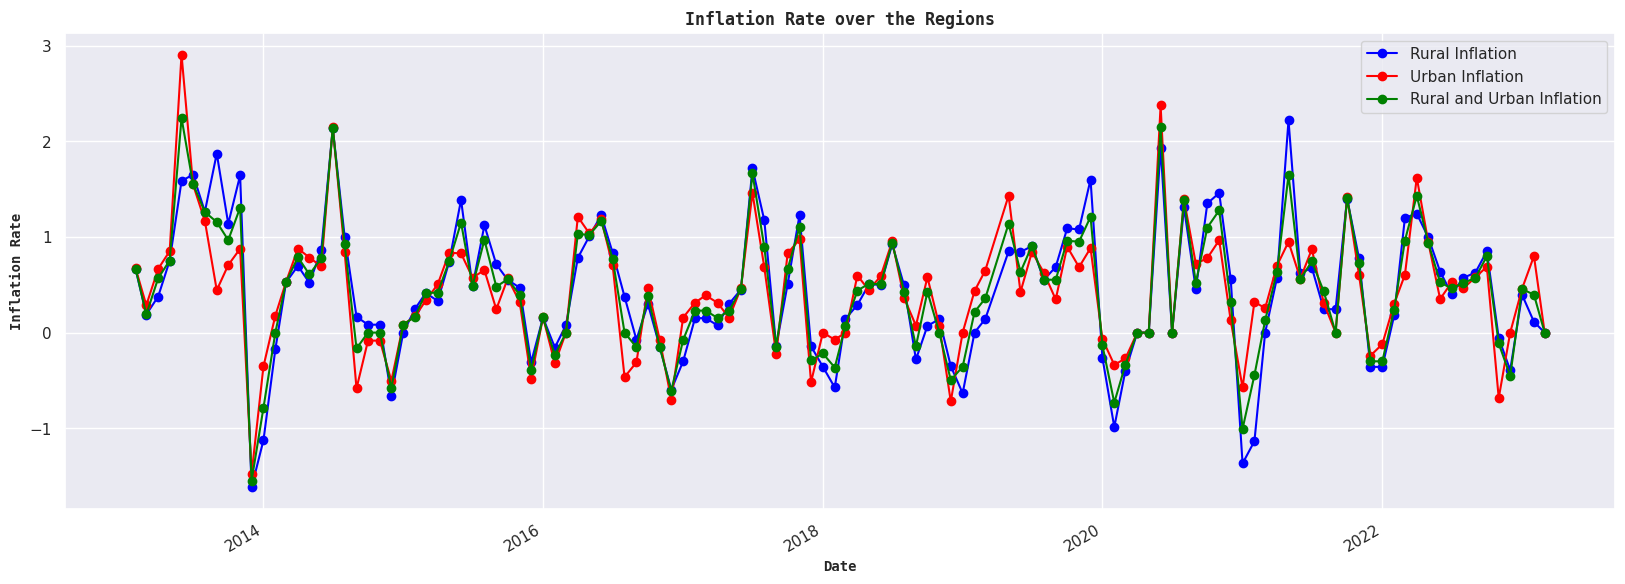

In [33]:
fig, ax = plt.subplots(figsize = (20,7))

ax.plot_date(df_r.Date, infl_r, color="blue", label="Rural Inflation", linestyle="-")
ax.plot_date(df_u.Date, infl_u, color="red", label="Urban Inflation", linestyle="-")
ax.plot_date(df_ru.Date,infl_ru , color="green", label="Rural and Urban Inflation", linestyle="-")

ax.set_xlabel('Date',fontproperties={'family':'monospace', 'size':10,'weight':'demibold'})
ax.set_ylabel('Inflation Rate',fontproperties={'family':'monospace', 'size':10,'weight':'demibold'})
ax.set_title('Inflation Rate over the Regions',size = 30, fontproperties={'family':'monospace', 'weight':'bold'})
ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

# Observation:
1. In all the sectors there is a positive growth in index numbers over the period of time.
2. For Rural sector, the *Housing* column was a redundant column.
3. Maximum fluctuations can be seen in *Vegetables, Egg, Fruits* columns for all the sectors. 
4. Remaining many columns exhibit very low fluctuations over the years.
5. From the *Inflation* plots of the sectors, it can be claimed that the inflations are a stationary process.


In [34]:
data = pd.DataFrame()
data['Date'] = df_r.Date
data['infl_r'] = infl_r
data['infl_u'] = infl_u
data['infl_ru'] = infl_ru
data['ind_r'] = df_r['General index']
data['ind_u'] = df_u['General index']
data['ind_ru'] = df_ru['General index']

Saving the data into a dataframe

In [35]:
data.to_csv('inflation_data.csv',index=False)



```
Further analysis and model fitting on the general CPI numbers were done in R-Studio
```

